# Importing libraries

In [19]:
#Importing libraries

# Data manipulation
import pandas as pd
import numpy as np

#For plotting
import seaborn as sns 
import matplotlib.pyplot as plt


In [20]:
#Loading data
df=pd.read_csv('WebserverLogFiles(Shammah) Final.csv')

In [21]:
#Data preparation
#Checking dataframe   
df.head(10)

,Time_of_Visit,IP_Address,Request_Method,Pages_Visited,Status_Code,Country,Sports,Frequency_of_visits,Gender,Age
0,21:15:04,154.164.248.153,POST,index.html,200,Argentina,Swimming,Once,Male,38
1,13:20:10,91.13.169.59,HEAD,index.html,200,China,Football,Often,Female,64
2,22:52:21,33.145.131.38,GET,index.html,200,Portugal,Swimming,Seldon,Male,29
3,4:53:24,105.190.70.43,CONNECT,images/games.html,100,Peru,Swimming,Often,Male,43
4,14:56:25,206.236.63.147,HEAD,searchsports.html,100,France,Football,Often,Male,60
5,15:28:21,249.44.113.238,CONNECT,Ticketing.html,200,Russia,Football,Once,Female,40
6,10:07:07,94.157.82.166,HEAD,searchsports.html,200,China,Gymnastics,Often,Male,65
7,15:56:31,73.243.163.110,GET,index.html,200,China,Basketball,Often,Female,56
8,12:17:01,45.61.137.216,HEAD,Ticketing.html,100,Uganda,Table Tennis,Once,Male,23
9,15:05:42,226.89.16.166,HEAD,searchsports.html,100,Bulgaria,Badminton,Seldon,Male,18


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22670 entries, 0 to 22669
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Time_of_Visit        22670 non-null  object
 1   IP_Address           22670 non-null  object
 2   Request_Method       22670 non-null  object
 3   Pages_Visited        22670 non-null  object
 4   Status_Code          22670 non-null  int64 
 5   Country              22670 non-null  object
 6   Sports               22670 non-null  object
 7   Frequency_of_visits  22670 non-null  object
 8   Gender               22670 non-null  object
 9   Age                  22670 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.7+ MB


In [23]:
df.describe()

,Status_Code,Age
count,22670.000000,22670.000000
mean,196.615792,41.492369
std,74.579440,13.887142
min,100.000000,18.000000
25%,200.000000,29.000000
50%,200.000000,41.000000
75%,200.000000,54.000000
max,500.000000,65.000000


In [24]:
#Shape of the dataframe
df.shape

(22670, 10)

In [25]:
#Checking missing values
null_counts = df.isnull().sum()
print(null_counts)

Time_of_Visit          0
IP_Address             0
Request_Method         0
Pages_Visited          0
Status_Code            0
Country                0
Sports                 0
Frequency_of_visits    0
Gender                 0
Age                    0
dtype: int64


In [29]:
#Exploratory Data Analysis

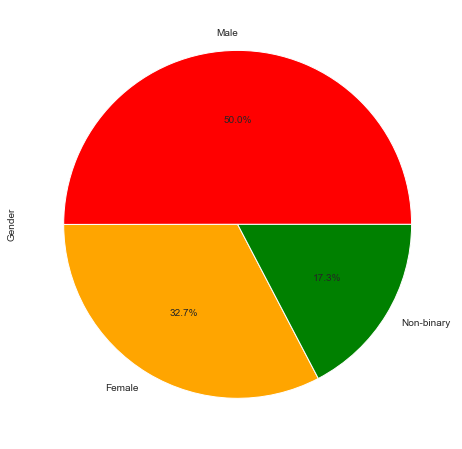

In [26]:
#Gender distribution of visit pie chart
colors = ['red', 'orange', 'green']
Piechart= df['Gender'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(8,8))
plt.show()

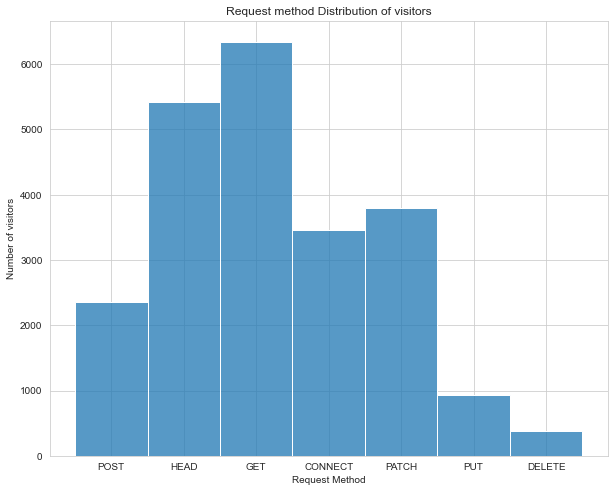

In [27]:
#Histogram showing Request_Methods by number of visitors

plt.figure(figsize=(10,8))
sns.histplot(x='Request_Method', data=df, bins=20)
plt.title('Request method Distribution of visitors')
plt.xlabel('Request Method')
plt.ylabel('Number of visitors')
plt.show()

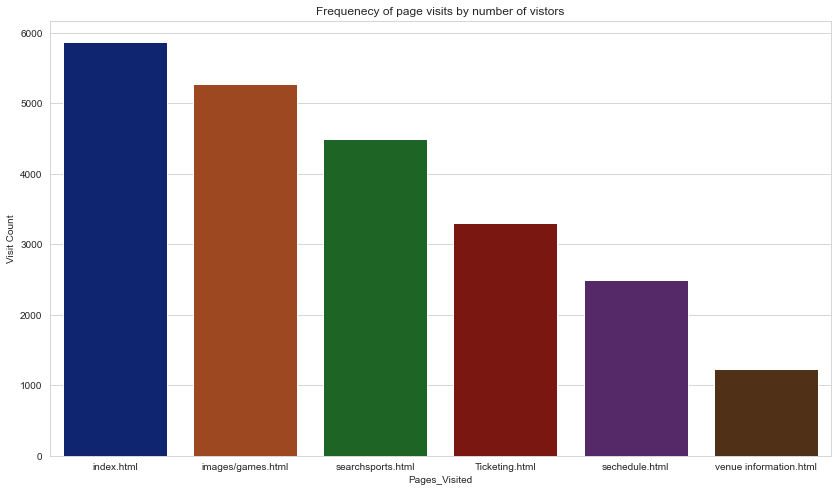

In [28]:
#Bar chart visualiztion of frequency of page visits
Pages_visits = df.groupby('Pages_Visited')['Frequency_of_visits'].count().reset_index().sort_values(by='Frequency_of_visits', ascending=False)
plt.figure(figsize=(14,8))
sns.barplot(x='Pages_Visited', y='Frequency_of_visits',data=Pages_visits, palette='dark')
plt.title('Frequenecy of page visits by number of vistors')
plt.xlabel('Pages_Visited')
plt.ylabel('Visit Count')
plt.show()

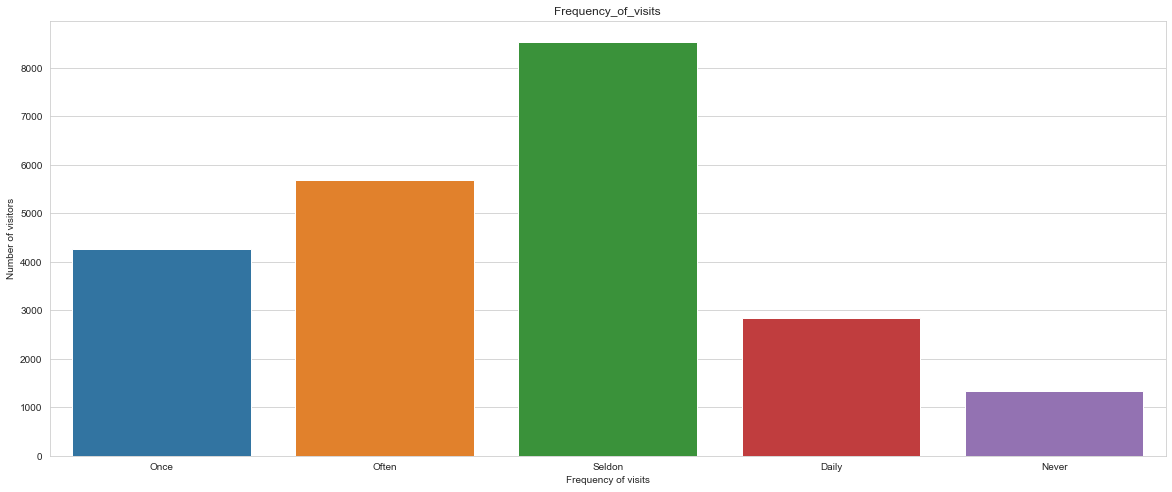

In [29]:
# Count plot showing frequency of visits 
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot(x='Frequency_of_visits', data=df)
plt.title('Frequency_of_visits')
plt.xlabel('Frequency of visits')
plt.ylabel('Number of visitors')
plt.show()

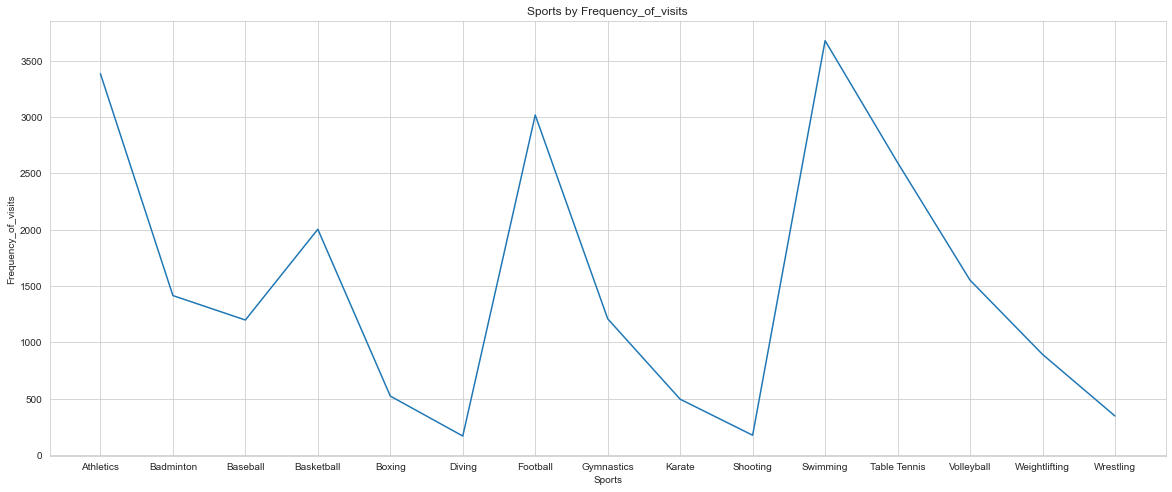

In [30]:
# line graph showing pages visted 
page_counts = df.groupby('Sports')['Frequency_of_visits'].count().reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x='Sports', y='Frequency_of_visits', data=page_counts)
plt.title('Sports by Frequency_of_visits')
plt.xlabel('Sports')
plt.ylabel('Frequency_of_visits')
plt.show()

In [31]:
#Clickstream analysis

# Click Paths Analysis
click_paths = df.groupby('IP_Address')['Sports'].apply(lambda x: ' > '.join(x)).reset_index(name='Click Path')
click_paths_count = click_paths['Click Path'].value_counts().reset_index()
click_paths_count.columns = ['Click Path', 'Frequency']
click_paths_count = click_paths_count.sort_values(by='Frequency', ascending=False)
print("Click Paths Analysis:")
print(click_paths_count)

Click Paths Analysis:
       Click Path  Frequency
0        Swimming       3679
1       Athletics       3386
2        Football       3019
3    Table Tennis       2597
4      Basketball       2005
5      Volleyball       1553
6       Badminton       1416
7      Gymnastics       1210
8        Baseball       1199
9   Weightlifting        894
10         Boxing        524
11         Karate        496
12      Wrestling        347
13       Shooting        176
14         Diving        169


In [16]:
#User segmentation
#User Segmentation by Country
country_segmentation = df.groupby('Country').size().reset_index(name='User Count')
country_segmentation = country_segmentation.sort_values(by='User Count', ascending=False)
print("User Segmentation by Country:")
print(country_segmentation)


User Segmentation by Country:
                   Country  User Count
42                   China        4200
88               Indonesia        2399
167                 Russia        1310
159            Philippines        1197
29                  Brazil         826
..                     ...         ...
176  Sao Tome and Principe           1
130                 Monaco           1
181           Sint Maarten           1
133             Montserrat           1
162            Puerto Rico           1

[225 rows x 2 columns]


In [17]:
#User Segmentation by Sport
sports_segmentation = df.groupby('Sports').size().reset_index(name='User Count')
sports_segmentation = sports_segmentation.sort_values(by='User Count', ascending=False)
print("User Segmentation by Sports:")
print(sports_segmentation)

User Segmentation by Sports:
           Sports  User Count
10       Swimming        3679
0       Athletics        3386
6        Football        3019
11   Table Tennis        2597
3      Basketball        2005
12     Volleyball        1553
1       Badminton        1416
7      Gymnastics        1210
2        Baseball        1199
13  Weightlifting         894
4          Boxing         524
8          Karate         496
14      Wrestling         347
9        Shooting         176
5          Diving         169


In [32]:
from IPython.display import IFrame
Dashboard = IFrame(src= "https://app.powerbi.com/view?r=eyJrIjoiOTUxMzE2NDctYzkxYS00OTQyLWFkMWItMzBjYmM3NzFhMmI5IiwidCI6ImVlMjkyOTc3LTdiNTgtNGRmNC04MTM4LTUwZDBkZTdkMjhkOCIsImMiOjh9", height = 700, width = 1000)
display(Dashboard)